<a href="https://colab.research.google.com/github/dev-alini/AlineJSantos.github.io/blob/main/Curso_Pandas_Primeiros_Passos_CDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Lendo os dados**

In [1]:
import pandas as pd

In [2]:
origem = 'https://raw.githubusercontent.com/ivansanchespetrucci/python-pandas/refs/heads/main/base_automoveis.csv'
dados = pd.read_csv(origem)
dados

,montadora,modelo,ano_fabricacao,valor_mercado
0,Ford,Focus,2017,62399.38
1,Volkswagen,Polo,2010,5000.00
2,Chevrolet,Corsa,2017,9944.40
3,Toyota,Yaris,2012,5000.00
4,Chevrolet,Cruze,2018,57020.67
...,...,...,...,...
95,Ford,Fiesta,2007,5000.00
96,Honda,HR-V,2012,5000.00
97,Volkswagen,Jetta,2019,32496.56
98,Chevrolet,Corsa,2022,56143.58


In [3]:
dados.head()

,montadora,modelo,ano_fabricacao,valor_mercado
0,Ford,Focus,2017,62399.38
1,Volkswagen,Polo,2010,5000.00
2,Chevrolet,Corsa,2017,9944.40
3,Toyota,Yaris,2012,5000.00
4,Chevrolet,Cruze,2018,57020.67


In [4]:
dados.tail()

,montadora,modelo,ano_fabricacao,valor_mercado
95,Ford,Fiesta,2007,5000.00
96,Honda,HR-V,2012,5000.00
97,Volkswagen,Jetta,2019,32496.56
98,Chevrolet,Corsa,2022,56143.58
99,Toyota,RAV4,2009,7970.51


## **Tipos de dados**

In [5]:
type(dados)

pandas.core.frame.DataFrame

In [6]:
dados.shape

(100, 4)

In [7]:
dados.columns

Index(['montadora', 'modelo', 'ano_fabricacao', 'valor_mercado'], dtype='object')

In [8]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   montadora       100 non-null    object 
 1   modelo          100 non-null    object 
 2   ano_fabricacao  100 non-null    int64  
 3   valor_mercado   97 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.3+ KB


## **Explorar os dados**

In [9]:
dados['montadora']

,montadora
0,Ford
1,Volkswagen
2,Chevrolet
3,Toyota
4,Chevrolet
...,...
95,Ford
96,Honda
97,Volkswagen
98,Chevrolet


## **Analise dos dados (EDA)**

In [10]:
dados['valor_mercado'].mean()

np.float64(19798.34556701031)

In [11]:
dados.groupby('montadora').mean(numeric_only=True)

,ano_fabricacao,valor_mercado
montadora,,
Chevrolet,2012.350000,17031.477895
Ford,2013.375000,20590.348125
Honda,2014.687500,19383.115714
Toyota,2014.565217,19886.930870
Volkswagen,2013.840000,21545.313600


In [12]:
dados.groupby('montadora')['valor_mercado'].mean()

,valor_mercado
montadora,
Chevrolet,17031.477895
Ford,20590.348125
Honda,19383.115714
Toyota,19886.930870
Volkswagen,21545.313600


In [13]:
dados.groupby('montadora')[['valor_mercado']].mean().sort_values('valor_mercado')

,valor_mercado
montadora,
Chevrolet,17031.477895
Honda,19383.115714
Toyota,19886.930870
Ford,20590.348125
Volkswagen,21545.313600


In [14]:
dados_montadora = dados.groupby('montadora')[['valor_mercado']].mean().sort_values('valor_mercado')
dados_montadora

,valor_mercado
montadora,
Chevrolet,17031.477895
Honda,19383.115714
Toyota,19886.930870
Ford,20590.348125
Volkswagen,21545.313600


<Axes: ylabel='montadora'>

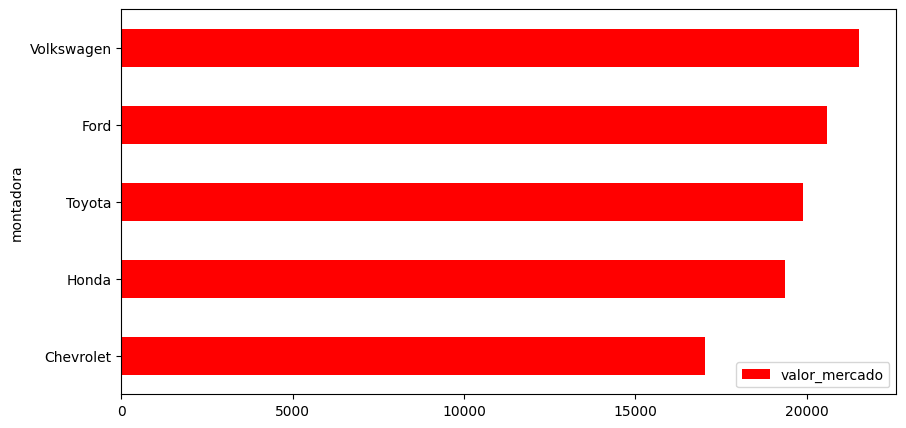

In [15]:
dados_montadora.plot(kind='barh', figsize=(10,5), color='red')

In [16]:
dados.montadora.value_counts()

,count
montadora,
Volkswagen,25
Toyota,23
Chevrolet,20
Ford,16
Honda,16


In [17]:
dados.montadora.value_counts(normalize=True)

,proportion
montadora,
Volkswagen,0.25
Toyota,0.23
Chevrolet,0.20
Ford,0.16
Honda,0.16


## **Valores NULOS**

In [18]:
dados.isnull().sum()

,0
montadora,0
modelo,0
ano_fabricacao,0
valor_mercado,3


In [19]:
dados = dados.fillna(0)

In [20]:
dados.isnull().sum()

,0
montadora,0
modelo,0
ano_fabricacao,0
valor_mercado,0


## **Aplicar Filtros**

In [21]:
dados.montadora.unique()

array(['Ford', 'Volkswagen', 'Chevrolet', 'Toyota', 'Honda'], dtype=object)

In [22]:
filtro = ['Toyota', 'Honda', 'Ford']

In [23]:
dados.query('montadora == "Ford"')

,montadora,modelo,ano_fabricacao,valor_mercado
0,Ford,Focus,2017,62399.38
12,Ford,Ka,2021,36823.04
15,Ford,Focus,2008,5000.00
26,Ford,Ka,2017,24748.14
38,Ford,Ka,2010,5000.00
40,Ford,Fusion,2009,8246.02
45,Ford,Fusion,2006,5000.00
46,Ford,Ka,2019,29725.86
54,Ford,EcoSport,2013,5000.00
65,Ford,Fusion,2011,5000.00


In [24]:
dados.query('@filtro in montadora')

,montadora,modelo,ano_fabricacao,valor_mercado
0,Ford,Focus,2017,62399.38
3,Toyota,Yaris,2012,5000.00
6,Honda,WR-V,2014,5000.00
9,Honda,WR-V,2010,5000.00
12,Ford,Ka,2021,36823.04
14,Honda,HR-V,2015,7386.78
15,Ford,Focus,2008,5000.00
17,Toyota,Yaris,2016,11074.95
20,Honda,Fit,2015,5000.00
23,Honda,WR-V,2023,0.00


In [25]:
dados_pesq = dados.query('@filtro in montadora')
dados_pesq

,montadora,modelo,ano_fabricacao,valor_mercado
0,Ford,Focus,2017,62399.38
3,Toyota,Yaris,2012,5000.00
6,Honda,WR-V,2014,5000.00
9,Honda,WR-V,2010,5000.00
12,Ford,Ka,2021,36823.04
14,Honda,HR-V,2015,7386.78
15,Ford,Focus,2008,5000.00
17,Toyota,Yaris,2016,11074.95
20,Honda,Fit,2015,5000.00
23,Honda,WR-V,2023,0.00


<Axes: ylabel='montadora'>

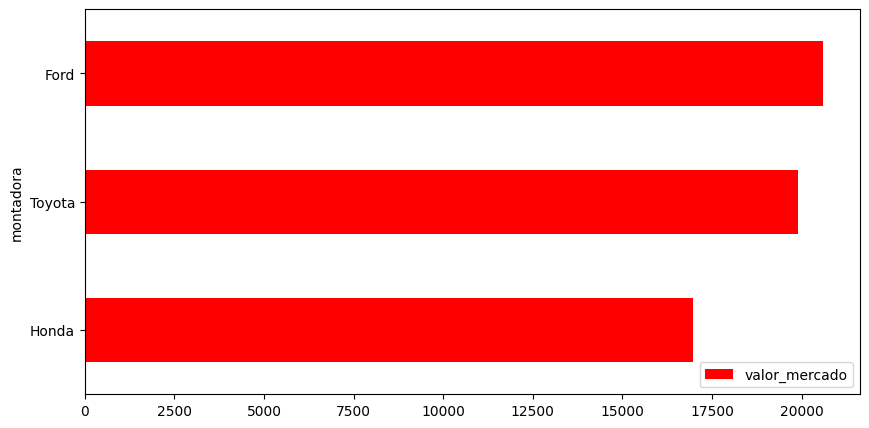

In [26]:
dados_montadora = dados_pesq.groupby('montadora')[['valor_mercado']].mean().sort_values('valor_mercado')
dados_montadora.plot(kind='barh', figsize=(10,5), color='red')

In [27]:
dados_pesq.montadora.value_counts(normalize=True)

,proportion
montadora,
Toyota,0.418182
Ford,0.290909
Honda,0.290909


# **Filtro1-ANO**

In [28]:
dados_filtro_ano = dados_pesq['ano_fabricacao'] > 2021
dados_pesq[dados_filtro_ano]

,montadora,modelo,ano_fabricacao,valor_mercado
23,Honda,WR-V,2023,0.00
25,Toyota,Etios,2022,86044.60
32,Honda,City,2023,45806.62
42,Toyota,Corolla,2022,46634.89
60,Honda,City,2023,74827.34
78,Toyota,Hilux,2022,94675.89
83,Honda,HR-V,2022,56433.30
87,Toyota,RAV4,2022,24113.48
90,Toyota,Hilux,2022,42740.59
92,Ford,Focus,2022,35918.10


# **Filtro2-VALOR**

In [29]:
dados_filtro_valor = dados_pesq['valor_mercado'] >= 60000
dados_pesq[dados_filtro_valor]

,montadora,modelo,ano_fabricacao,valor_mercado
0,Ford,Focus,2017,62399.38
25,Toyota,Etios,2022,86044.60
60,Honda,City,2023,74827.34
78,Toyota,Hilux,2022,94675.89


In [30]:
dados_filtro_final = (dados_filtro_ano) & (dados_filtro_valor)
dados_pesq[dados_filtro_final]

,montadora,modelo,ano_fabricacao,valor_mercado
25,Toyota,Etios,2022,86044.60
60,Honda,City,2023,74827.34
78,Toyota,Hilux,2022,94675.89


In [31]:
selecao = dados_pesq.query('ano_fabricacao >2020 and valor_mercado >= 30000')
selecao

,montadora,modelo,ano_fabricacao,valor_mercado
12,Ford,Ka,2021,36823.04
25,Toyota,Etios,2022,86044.60
32,Honda,City,2023,45806.62
42,Toyota,Corolla,2022,46634.89
60,Honda,City,2023,74827.34
73,Ford,Fusion,2021,56785.61
78,Toyota,Hilux,2022,94675.89
83,Honda,HR-V,2022,56433.30
90,Toyota,Hilux,2022,42740.59
92,Ford,Focus,2022,35918.10


## **Salvar os dados**

In [37]:
selecao.to_csv('pesq_claudio.csv',index=False)
pd.read_csv('pesq_claudio.csv')

,montadora,modelo,ano_fabricacao,valor_mercado
0,Ford,Ka,2021,36823.04
1,Toyota,Etios,2022,86044.60
2,Honda,City,2023,45806.62
3,Toyota,Corolla,2022,46634.89
4,Honda,City,2023,74827.34
5,Ford,Fusion,2021,56785.61
6,Toyota,Hilux,2022,94675.89
7,Honda,HR-V,2022,56433.30
8,Toyota,Hilux,2022,42740.59
9,Ford,Focus,2022,35918.10
